In [1]:
import pylab as plt
import numpy as np
from gastrometry import return_var_map
import pickle
%matplotlib inline

In [2]:
def plot_correlation_function(interp, comp='u', Title=None):

    EXT = [np.min(interp._2pcf_dist[:,0]/60.), np.max(interp._2pcf_dist[:,0]/60.),
           np.min(interp._2pcf_dist[:,1]/60.), np.max(interp._2pcf_dist[:,1]/60.)]
    CM = plt.cm.seismic

    MAX = np.max(interp._2pcf)
    N = int(np.sqrt(len(interp._2pcf)))
    plt.figure(figsize=(14,8) ,frameon=False)
    plt.gca().patch.set_alpha(0)
    plt.subplots_adjust(wspace=0.5, hspace=0.3, left=0.07,right=0.95, bottom=0.1,top=0.92)
    
    plt.subplot(2,3,1)
    plt.imshow(interp._2pcf.reshape(N,N), extent=EXT, interpolation='nearest', origin='lower',
               vmin=-MAX, vmax=MAX, cmap=CM)
    cbar = plt.colorbar()
    cbar.formatter.set_powerlimits((0, 0))
    cbar.update_ticks()
    cbar.set_label('$\\xi$ (mas$^2$)',fontsize=16)
    plt.xlabel('$\Delta u$ (arcmin)',fontsize=16)
    plt.ylabel('$\Delta v$ (arcmin)',fontsize=16)
    plt.title('Measured 2-PCF',fontsize=16)

    plt.subplot(2,3,2)
    plt.imshow(interp._2pcf_fit.reshape(N,N), extent=EXT, interpolation='nearest',
               origin='lower',vmin=-MAX,vmax=MAX, cmap=CM)
    cbar = plt.colorbar()
    cbar.formatter.set_powerlimits((0, 0))
    cbar.update_ticks()
    cbar.set_label('$\\xi\'$ (mas$^2$)',fontsize=16)
    plt.xlabel('$\Delta u$ (arcmin)',fontsize=16)

    pull = (interp._2pcf.reshape(N,N) - interp._2pcf_fit.reshape(N,N)) #/ np.sqrt(var)

    plt.title('Fitted 2-PCF',fontsize=16)

    plt.subplot(2,3,3)

    plt.imshow(pull, extent=EXT, interpolation='nearest', origin='lower', vmin=-MAX,vmax=MAX, cmap=CM)#, vmin=-5., vmax=+5., cmap=cm_residual)
    cbar = plt.colorbar()
    cbar.formatter.set_powerlimits((0, 0))
    cbar.update_ticks()
    cbar.set_label('$\\xi - \\xi\'$ (mas$^2$)',fontsize=16)
    #cbar.set_label('$\\frac{\\xi-\\xi\'}{\sigma_{\\xi}}$',fontsize=20)
    plt.xlabel('$\Delta u$ (arcmin)',fontsize=16)
    plt.title('Residuals',fontsize=16)
    
    MAX = 15
    plt.subplot(2,3,4)
    plt.scatter(interp._u/60., interp._v/60., c=interp._y_meas,
                s=10, cmap=plt.cm.seismic, vmin=-MAX, vmax=MAX)
    cbar = plt.colorbar()
    cbar.set_label('d'+comp+' measured (mas)',fontsize=16)
    plt.axis('equal')
    plt.title('Data',fontsize=16)
    plt.ylabel('v (arcmin)', fontsize=16)
    plt.xlabel('u (arcmin)', fontsize=16)
    

    plt.subplot(2,3,5)
    plt.scatter(interp._u/60., interp._v/60., c=interp._y_predict,
                s=10, cmap=plt.cm.seismic, vmin=-MAX, vmax=MAX)
    cbar = plt.colorbar()
    cbar.set_label('d'+comp+' predict (mas)',fontsize=16)
    plt.axis('equal')
    plt.title('GP predict',fontsize=16)
    plt.xlabel('u (arcmin)', fontsize=16)

    plt.subplot(2,3,6)
    plt.scatter(interp._u/60., interp._v/60., c=interp._y_meas - interp._y_predict,
                s=10, cmap=plt.cm.seismic, vmin=-MAX, vmax=MAX)
    cbar = plt.colorbar()
    cbar.set_label('d'+comp+' measured - d'+comp+' predict (mas)',fontsize=16)
    plt.axis('equal')
    plt.title('Residuals',fontsize=16)
    plt.xlabel('u (arcmin)', fontsize=16)
    
    if Title is not None:
        plt.suptitle(Title, fontsize=16)
    
class interp_gp:
    def __init__(self, pkl_file, comp='u'):
        dic = pickle.load(open(pkl_file, 'rb'))
        self._2pcf = dic['gp_output']['gp'+comp+'.2pcf']
        self._2pcf_dist = dic['gp_output']['gp'+comp+'.2pcf_dist']
        self._2pcf_fit = dic['gp_output']['gp'+comp+'.2pcf_fit']
        self._2pcf_weight = dic['gp_output']['gp'+comp+'.2pcf_weight']
        self._2pcf_mask = dic['gp_output']['gp'+comp+'.2pcf_mask']
        self._u = dic['gp_output']['gp'+comp+'.coords_test'][:,0]
        self._v = dic['gp_output']['gp'+comp+'.coords_test'][:,1]
        self._y_meas = dic['gp_output']['gp'+comp+'.d'+comp+'_test']
        self._y_predict = dic['gp_output']['gp'+comp+'.d'+comp+'_test_predict']


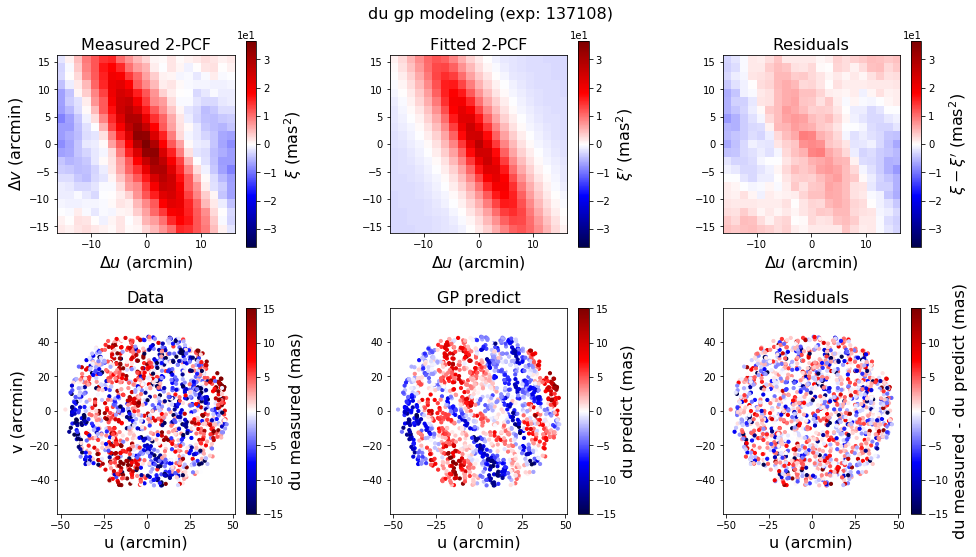

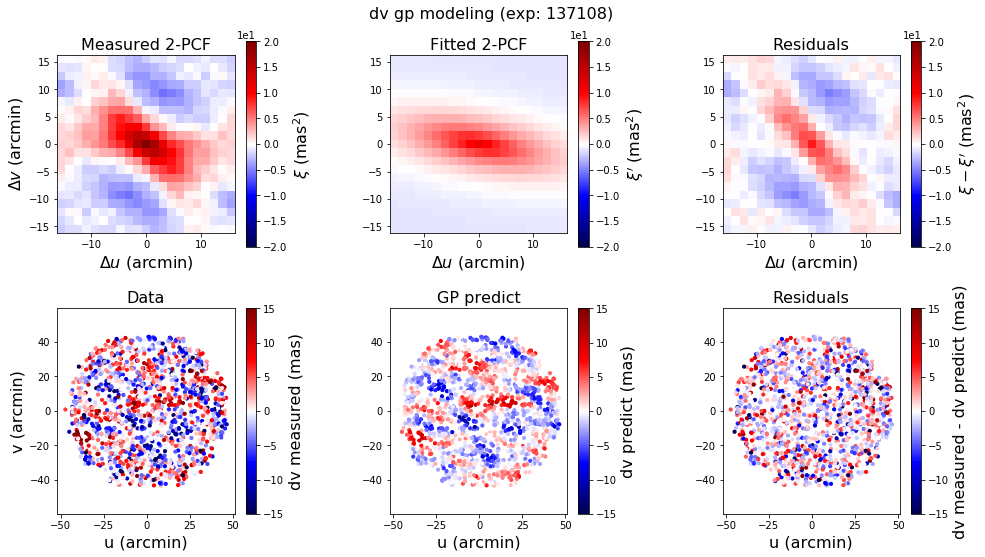

In [3]:
interp = interp_gp('../../../hsc_outputs/v3.3/astro_VK_with_mean/137108_z/gp_output_137108.pkl', comp = 'u')
plot_correlation_function(interp, comp='u', Title='du gp modeling (exp: 137108)')
plt.savefig('137108_du_gp.png')
interp = interp_gp('../../../hsc_outputs/v3.3/astro_VK_with_mean/137108_z/gp_output_137108.pkl', comp = 'v')
plot_correlation_function(interp, comp='v', Title='dv gp modeling (exp: 137108)')
plt.savefig('137108_dv_gp.png')

In [4]:
dic = pickle.load(open('../../../hsc_outputs/v3.3/astro_VK_with_mean/137108_z/gp_output_137108.pkl', 'rb'))

In [8]:
dic['2pcf_stat'].keys()

dict_keys(['xib', 'xie', 'logr', 'xiplus', 'ximinus', 'xicross', 'xi_dudu', 'xi_dudv', 'xi_dvdv', 'xi_sep', 'xib_test', 'xie_test', 'logr_test', 'xib_residuals', 'xie_residuals', 'logr_residuals'])

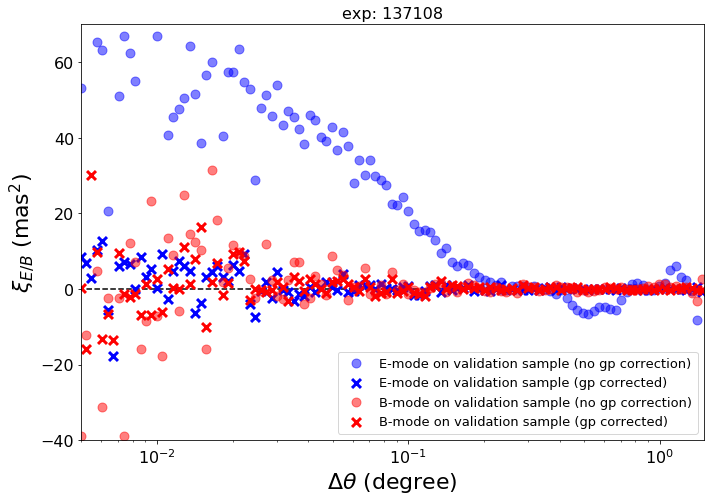

In [44]:
plt.figure(figsize=(10,7))
plt.subplots_adjust(top=0.95, right=0.99)
plt.title('exp: 137108', fontsize=16)
plt.scatter(np.exp(dic['2pcf_stat']['logr_test']), dic['2pcf_stat']['xie_test'], c='b', s=80, alpha=0.5, label='E-mode on validation sample (no gp correction)')
plt.scatter(np.exp(dic['2pcf_stat']['logr_test']), dic['2pcf_stat']['xie_residuals'], c='b', marker='x', lw=3, s=80, label='E-mode on validation sample (gp corrected)')
plt.scatter(np.exp(dic['2pcf_stat']['logr_test']), dic['2pcf_stat']['xib_test'], c='r', s=80, alpha=0.5, label='B-mode on validation sample (no gp correction)')
plt.scatter(np.exp(dic['2pcf_stat']['logr_test']), dic['2pcf_stat']['xib_residuals'], c='r', marker='x', s=80, lw=3, label='B-mode on validation sample (gp corrected)')
plt.plot(np.exp(dic['2pcf_stat']['logr_test']), np.zeros_like(np.exp(dic['2pcf_stat']['logr_test'])), 'k--', zorder=0)
plt.ylim(-40,70)
plt.xlim(0.005, 1.5)
plt.xscale('log')
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel('$\Delta \\theta$ (degree)', fontsize=22)
plt.ylabel('$\\xi_{E/B}$ (mas$^2$)', fontsize=22)
plt.legend(loc=4, fontsize=13)
plt.savefig('137108_z_eb_mode_gp_corrected.pdf')